<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-14 19:50:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   113MB/s    in 0.9s    

2024-07-14 19:50:24 (113 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tr
import matplotlib.pyplot as plt

In [ ]:
import random
import matplotlib.image as mpimg

In [ ]:
import os

In [ ]:
def random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"image shape is {img.shape}")

  return img

['3750472.jpg']
image shape is (512, 512, 3)


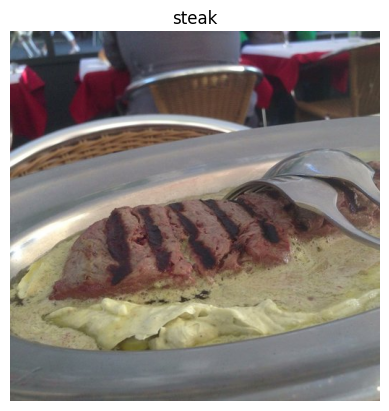

In [ ]:
img = random_image('pizza_steak/train/', 'steak')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/test"
val_dir = "/content/pizza_steak/train"

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary",seed = 42 )
valid_data = valid_datagen.flow_from_directory(directory = val_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)




Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation = 'relu'),
        tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
        tf.keras.layers.Conv2D(10,2,activation = 'relu'),
        tf.keras.layers.Conv2D(10,3,activation = 'relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation = 'sigmoid')


    ]
)

In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

Epoch 1/5
16/16 [==============================] - 65s 4s/step - loss: 0.6865 - accuracy: 0.5360 - val_loss: 0.6556 - val_accuracy: 0.5113
Epoch 2/5
16/16 [==============================] - 65s 4s/step - loss: 0.5749 - accuracy: 0.6500 - val_loss: 0.5186 - val_accuracy: 0.7527
Epoch 3/5
16/16 [==============================] - 62s 4s/step - loss: 0.4289 - accuracy: 0.8240 - val_loss: 0.4919 - val_accuracy: 0.7820
Epoch 4/5
16/16 [==============================] - 65s 4s/step - loss: 0.3551 - accuracy: 0.8600 - val_loss: 0.4633 - val_accuracy: 0.8020
Epoch 5/5
16/16 [==============================] - 62s 4s/step - loss: 0.3102 - accuracy: 0.8680 - val_loss: 0.4338 - val_accuracy: 0.8107


# Read CNN explainer to learn more information

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),

])

model2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history_2 = model2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
16/16 [==============================] - 9s 496ms/step - loss: 1.5879 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 12s 797ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 7s 456ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 7s 456ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 12s 798ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Without cnn layers**

In [ ]:
model3 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, 'relu'),
    tf.keras.layers.Dense(100, 'relu') ,
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(1,'sigmoid'),


])

model3.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
model3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data,validation_steps = len(valid_data) )

Epoch 1/5
16/16 [==============================] - 20s 1s/step - loss: 7.8216 - accuracy: 0.5660 - val_loss: 0.7371 - val_accuracy: 0.7200
Epoch 2/5
16/16 [==============================] - 15s 937ms/step - loss: 0.5720 - accuracy: 0.7540 - val_loss: 0.6817 - val_accuracy: 0.6160
Epoch 3/5
16/16 [==============================] - 15s 942ms/step - loss: 0.7330 - accuracy: 0.6960 - val_loss: 0.9246 - val_accuracy: 0.7267
Epoch 4/5
16/16 [==============================] - 13s 829ms/step - loss: 0.5831 - accuracy: 0.7780 - val_loss: 0.6792 - val_accuracy: 0.7707
Epoch 5/5
16/16 [==============================] - 13s 829ms/step - loss: 0.4645 - accuracy: 0.8300 - val_loss: 0.7570 - val_accuracy: 0.7307


### **Using Data Augumentation**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_aug = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 20,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip =True,

)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:

test_dir = "/content/pizza_steak/test"
train_dir = "/content/pizza_steak/train"


In [ ]:
print('augumented Data')
train_data_aug = train_data_aug.flow_from_directory(train_dir, target_size= (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    shuffle = False)
print('test_data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,class_mode = 'binary', shuffle = False)


augumented Data
Found 1500 images belonging to 2 classes.
test_data
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data_aug.next()


(-0.5, 223.5, 223.5, -0.5)

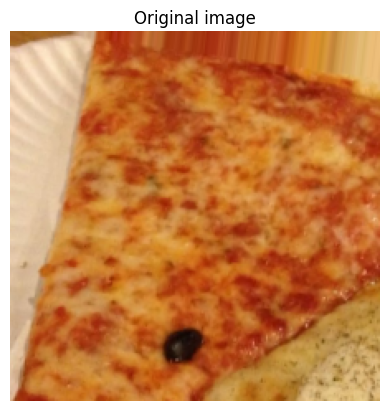

In [ ]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
